## 1. Reading Modules


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from scipy import ndimage, misc
import skimage
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Sequential
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout



In [ ]:
from google.colab import drive  #mount the code
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Dog_breed.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [ ]:
filelist  = []

for dirname, _, filenames in os.walk('/content/train'):
    for filename in filenames:
        filelist.append (os.path.join(dirname, filename))   


In [ ]:
filelist[:5]

['/content/train/b9f96dd0c9f3dc7e755d9b8cbb124f3b.jpg',
 '/content/train/f706682a30021cc74cd9416dac25e943.jpg',
 '/content/train/8f3e10fab6ea57479f91a5c6efc11351.jpg',
 '/content/train/65a3a8d1011f95e937d77e3a79700dad.jpg',
 '/content/train/324759773574e9bd6d6ba9c58e1550f9.jpg']

In [ ]:
labels = pd.read_csv("labels.csv")

In [ ]:
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
len(labels['breed'].unique())
pd.value_counts(labels.breed)

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [ ]:
from os.path import join
image_dir = '/content/train'


In [ ]:
filelist = []
image_path1 = []

for dir_name, _, filenames in os.walk('/content/train'):
  print(filenames)
  for filename in filenames:
    image_path1.append(join(image_dir, filename))

['b9f96dd0c9f3dc7e755d9b8cbb124f3b.jpg', 'f706682a30021cc74cd9416dac25e943.jpg', '8f3e10fab6ea57479f91a5c6efc11351.jpg', '65a3a8d1011f95e937d77e3a79700dad.jpg', '324759773574e9bd6d6ba9c58e1550f9.jpg', '448a19d0d6e8297339b42a2f51e824b2.jpg', 'ed9c22ad21413691f548f5d72e7a76d9.jpg', '30f2346a18ad08659cd3c9b24328a60e.jpg', 'b52bb521afa1dfe802a27a8939a8c7d0.jpg', '7ff9004706a91d585b8ec5c70ed661f9.jpg', '09c62a1ff26b3e83a2d476c2add054b1.jpg', '680a84b9565cf178d95cc02b6f66969e.jpg', 'bbf5a9514379e83803f3c27ffdd8869a.jpg', '5b903adeb4c923ba3046929c7062927a.jpg', '03b9ab173e5862580909fee10f0ea46d.jpg', '29af5684098bf507ac2566deef4be960.jpg', 'e21bbd2082fe9e256d856c9482aaac8c.jpg', '3d160295116b1d249fef3690061dfcb2.jpg', '151474b992b295f69547839e31271dd0.jpg', '62b930bc746b25a1a68518194c0ef059.jpg', '685b0a223c6ec08677df6800250d8cfd.jpg', 'f99c0ede8bf16d5e94a3a69ffb97b341.jpg', 'ffc2b6b9133a6413c4a013cff29f9ed2.jpg', '3fc2dde0964144cd07747c740469e60b.jpg', '4b5b818436bd7a7a83fbb02b9880727c.jpg',

In [ ]:
image_path1[:3]

['/content/train/b9f96dd0c9f3dc7e755d9b8cbb124f3b.jpg',
 '/content/train/f706682a30021cc74cd9416dac25e943.jpg',
 '/content/train/8f3e10fab6ea57479f91a5c6efc11351.jpg']

In [ ]:
labels_train = []

for i in labels['breed']:
  labels_train.append(i)

In [ ]:
len(image_path1), len(labels_train)

(10222, 10222)

In [ ]:
type(image_path1), type(labels_train)

(list, list)

In [ ]:
df_dog = pd.DataFrame(list(zip(image_path1, labels_train)), columns= ['Imagepath', 'Labels'])

In [ ]:
df_dog

,Imagepath,Labels
0,/content/train/b9f96dd0c9f3dc7e755d9b8cbb124f3...,boston_bull
1,/content/train/f706682a30021cc74cd9416dac25e94...,dingo
2,/content/train/8f3e10fab6ea57479f91a5c6efc1135...,pekinese
3,/content/train/65a3a8d1011f95e937d77e3a79700da...,bluetick
4,/content/train/324759773574e9bd6d6ba9c58e1550f...,golden_retriever
...,...,...
10217,/content/train/5c13e38df48763724a42552504b8dde...,borzoi
10218,/content/train/c9bbc4ce586c0d73e14bee1b1e674ba...,dandie_dinmont
10219,/content/train/41cdc849e6032e410cf32c6a274fe2a...,airedale
10220,/content/train/6fa11f3d4cd5e972b5be8a871674017...,miniature_pinscher


In [ ]:
a=df_dog.Labels.value_counts()[:10]

In [ ]:
a

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: Labels, dtype: int64

In [ ]:
labels_needed = ['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian', 'basenji', 
                 'samoyed']

In [ ]:
all_lables = set(df_dog.Labels.unique())
len(all_lables)

120

In [ ]:
s = all_lables.difference(set(labels_needed))
print(len(s))

110


In [ ]:
not_needed_lables = list(s)
not_needed_lables

['west_highland_white_terrier',
 'vizsla',
 'yorkshire_terrier',
 'lhasa',
 'australian_terrier',
 'irish_wolfhound',
 'collie',
 'welsh_springer_spaniel',
 'rhodesian_ridgeback',
 'doberman',
 'toy_poodle',
 'cairn',
 'toy_terrier',
 'border_terrier',
 'affenpinscher',
 'keeshond',
 'wire-haired_fox_terrier',
 'dandie_dinmont',
 'appenzeller',
 'pekinese',
 'brabancon_griffon',
 'standard_poodle',
 'standard_schnauzer',
 'boxer',
 'weimaraner',
 'miniature_schnauzer',
 'english_springer',
 'clumber',
 'kerry_blue_terrier',
 'chihuahua',
 'dingo',
 'english_setter',
 'walker_hound',
 'malamute',
 'japanese_spaniel',
 'greater_swiss_mountain_dog',
 'bedlington_terrier',
 'bloodhound',
 'border_collie',
 'old_english_sheepdog',
 'miniature_pinscher',
 'leonberg',
 'kuvasz',
 'silky_terrier',
 'irish_setter',
 'eskimo_dog',
 'norwich_terrier',
 'ibizan_hound',
 'dhole',
 'english_foxhound',
 'malinois',
 'american_staffordshire_terrier',
 'sealyham_terrier',
 'african_hunting_dog',
 'germ

In [ ]:
#df_temp = df_dog.loc[df_dog["Labels"] in labels_needed]

In [ ]:
'''# Set the index of the DataFrame to the country name
df_temp = df_dog.set_index("Labels")
df_temp.head()'''

'# Set the index of the DataFrame to the country name\ndf_temp = df_dog.set_index("Labels")\ndf_temp.head()'

In [ ]:
#df_temp.shape

In [ ]:
#df_temp = df_temp.drop(not_needed_lables)
#df_temp

### Taking only those 10 labels here.

In [ ]:
labels_needed = ['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian', 'basenji', 
                 'samoyed']

In [ ]:
all_lables = set(df_dog.Labels.unique())
len(all_lables)

120

In [ ]:
s = all_lables.difference(set(labels_needed))

print(len(s))



110


In [ ]:
not_needed_lables = list(s)
not_needed_lables

['west_highland_white_terrier',
 'vizsla',
 'yorkshire_terrier',
 'lhasa',
 'australian_terrier',
 'irish_wolfhound',
 'collie',
 'welsh_springer_spaniel',
 'rhodesian_ridgeback',
 'doberman',
 'toy_poodle',
 'cairn',
 'toy_terrier',
 'border_terrier',
 'affenpinscher',
 'keeshond',
 'wire-haired_fox_terrier',
 'dandie_dinmont',
 'appenzeller',
 'pekinese',
 'brabancon_griffon',
 'standard_poodle',
 'standard_schnauzer',
 'boxer',
 'weimaraner',
 'miniature_schnauzer',
 'english_springer',
 'clumber',
 'kerry_blue_terrier',
 'chihuahua',
 'dingo',
 'english_setter',
 'walker_hound',
 'malamute',
 'japanese_spaniel',
 'greater_swiss_mountain_dog',
 'bedlington_terrier',
 'bloodhound',
 'border_collie',
 'old_english_sheepdog',
 'miniature_pinscher',
 'leonberg',
 'kuvasz',
 'silky_terrier',
 'irish_setter',
 'eskimo_dog',
 'norwich_terrier',
 'ibizan_hound',
 'dhole',
 'english_foxhound',
 'malinois',
 'american_staffordshire_terrier',
 'sealyham_terrier',
 'african_hunting_dog',
 'germ

In [ ]:
Filepaths   = []
labels = []

for image_file in filelist:
    label = image_file.split(os.path.sep)[-2]
    if label in labels_needed:

        Filepaths.append(image_file)
        labels.append(label)
    


In [ ]:
image_path1

['/content/train/b9f96dd0c9f3dc7e755d9b8cbb124f3b.jpg',
 '/content/train/f706682a30021cc74cd9416dac25e943.jpg',
 '/content/train/8f3e10fab6ea57479f91a5c6efc11351.jpg',
 '/content/train/65a3a8d1011f95e937d77e3a79700dad.jpg',
 '/content/train/324759773574e9bd6d6ba9c58e1550f9.jpg',
 '/content/train/448a19d0d6e8297339b42a2f51e824b2.jpg',
 '/content/train/ed9c22ad21413691f548f5d72e7a76d9.jpg',
 '/content/train/30f2346a18ad08659cd3c9b24328a60e.jpg',
 '/content/train/b52bb521afa1dfe802a27a8939a8c7d0.jpg',
 '/content/train/7ff9004706a91d585b8ec5c70ed661f9.jpg',
 '/content/train/09c62a1ff26b3e83a2d476c2add054b1.jpg',
 '/content/train/680a84b9565cf178d95cc02b6f66969e.jpg',
 '/content/train/bbf5a9514379e83803f3c27ffdd8869a.jpg',
 '/content/train/5b903adeb4c923ba3046929c7062927a.jpg',
 '/content/train/03b9ab173e5862580909fee10f0ea46d.jpg',
 '/content/train/29af5684098bf507ac2566deef4be960.jpg',
 '/content/train/e21bbd2082fe9e256d856c9482aaac8c.jpg',
 '/content/train/3d160295116b1d249fef3690061dfcb

In [ ]:
len(image_path1), len(labels_train)

(10222, 10222)

### Creating a dataframe with file paths and the labels for them

In [ ]:
df = pd.DataFrame(list(zip(image_path1, labels_train)), columns= ['Filepath', 'Labels'])
df

,Filepath,Labels
0,/content/train/b9f96dd0c9f3dc7e755d9b8cbb124f3...,boston_bull
1,/content/train/f706682a30021cc74cd9416dac25e94...,dingo
2,/content/train/8f3e10fab6ea57479f91a5c6efc1135...,pekinese
3,/content/train/65a3a8d1011f95e937d77e3a79700da...,bluetick
4,/content/train/324759773574e9bd6d6ba9c58e1550f...,golden_retriever
...,...,...
10217,/content/train/5c13e38df48763724a42552504b8dde...,borzoi
10218,/content/train/c9bbc4ce586c0d73e14bee1b1e674ba...,dandie_dinmont
10219,/content/train/41cdc849e6032e410cf32c6a274fe2a...,airedale
10220,/content/train/6fa11f3d4cd5e972b5be8a871674017...,miniature_pinscher


In [ ]:
from sklearn.utils import shuffle
df = (df.sample(frac = 1).reset_index()).drop(columns = 'index')
df


,Filepath,Labels
0,/content/train/2a8ac4ec28af4aa4bbb7e35dda82c6e...,west_highland_white_terrier
1,/content/train/1c5575083fe9e346d66eac01d2cc548...,brabancon_griffon
2,/content/train/ec483170d4a9c12f9f7bd0d691de7c6...,basset
3,/content/train/42fc4f86c553289b9f3a89171e840c7...,english_springer
4,/content/train/18b79147982f9a14c768a256d3696a1...,standard_schnauzer
...,...,...
10217,/content/train/c25b1b2e1919a58239ac16ee53bdd44...,whippet
10218,/content/train/7f1746ba7ed8254df3be3c2a1ab97e5...,irish_water_spaniel
10219,/content/train/6ca9149d85c705eab3f870619ee87e5...,kuvasz
10220,/content/train/c043f726c52f93c83fa0100a8a77648...,beagle


### Displaying first 12 pictures

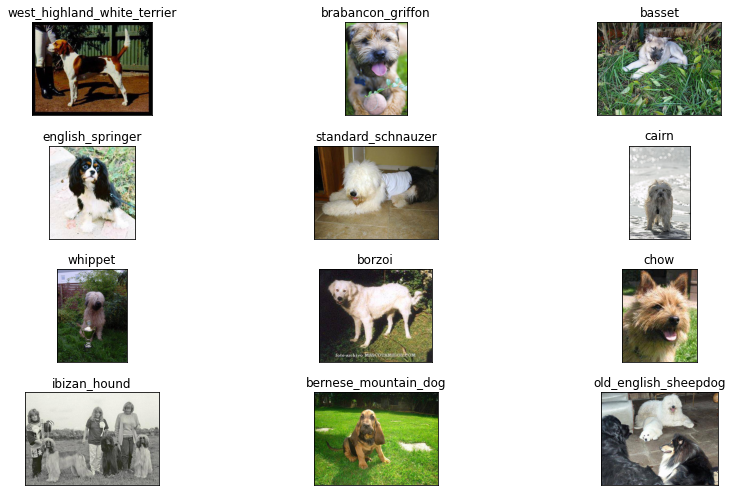

In [ ]:
f,a = plt.subplots(nrows=4, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Labels[i])
    
plt.tight_layout()
plt.show()

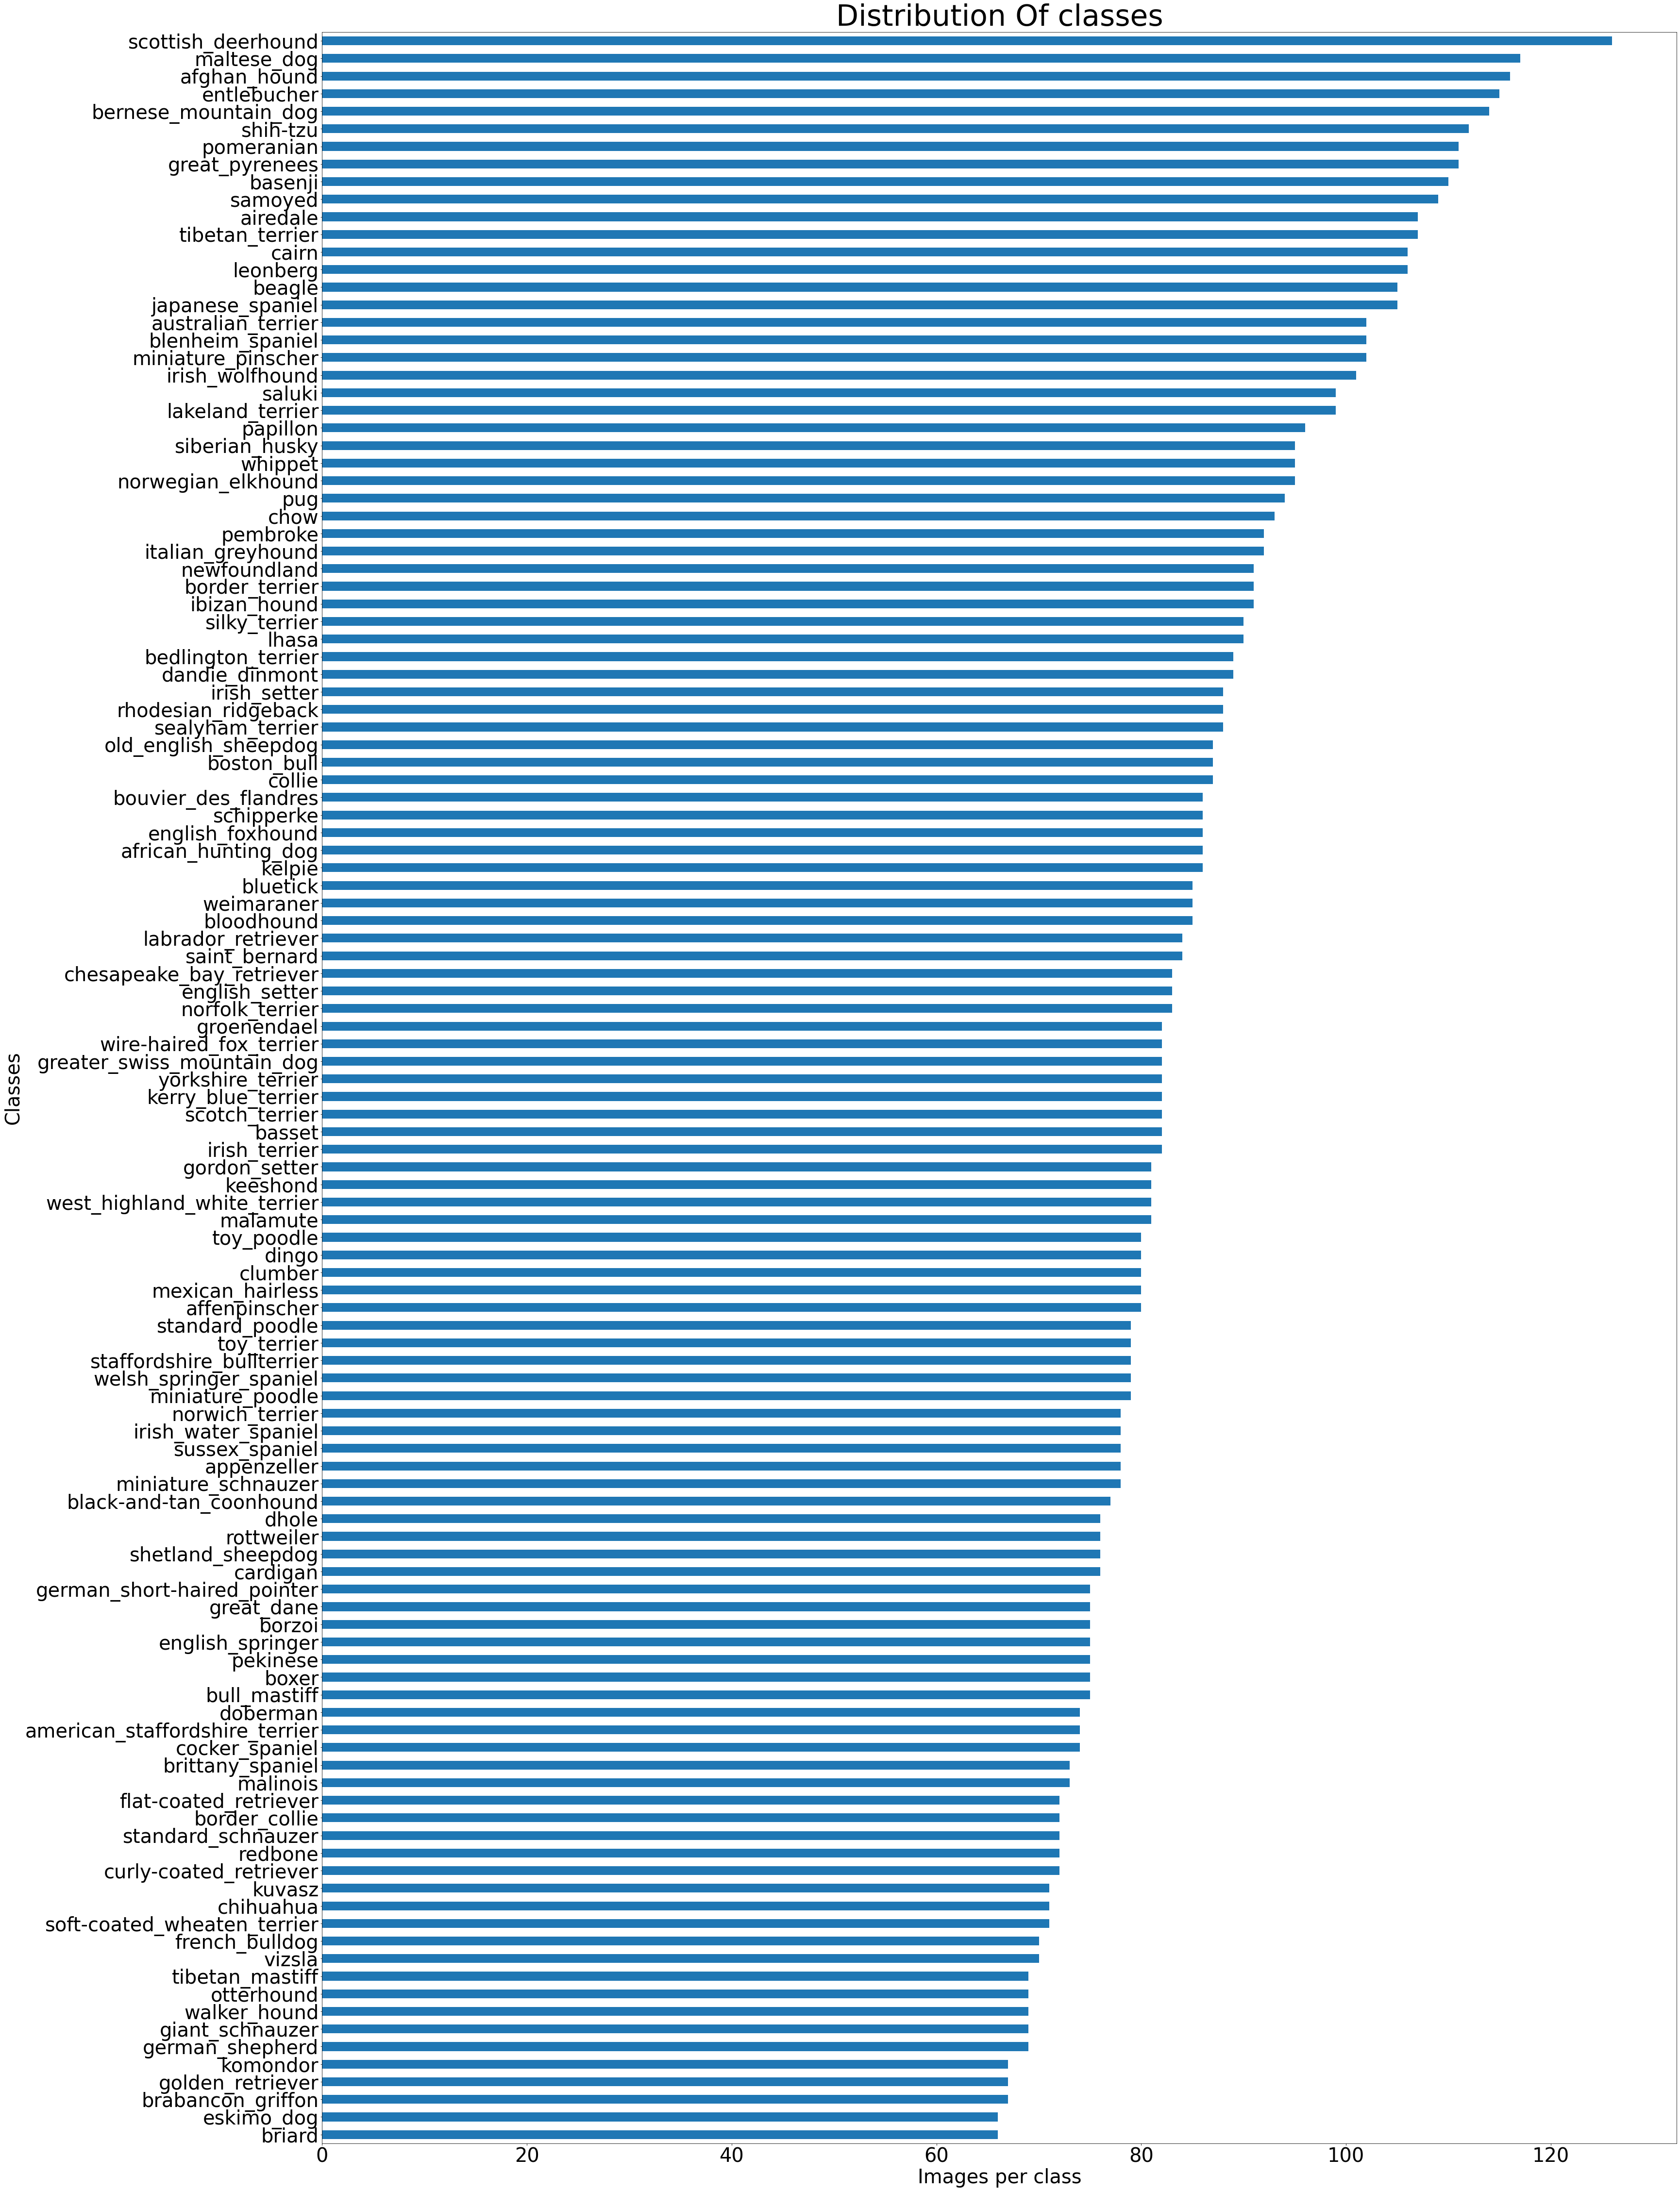

In [ ]:
ax=pd.value_counts(df['Labels'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Distribution Of classes",
                                                       figsize=(50,80))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)
plt.show()

### Checking for class imbalance

In [ ]:
df.Labels.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: Labels, Length: 120, dtype: int64

* Class imbalance present.

### Splitting the data And Creating data generator

In [ ]:
train_ratio = .75
validation_ratio = 0.10
test_ratio = 0.25

train, test = train_test_split(df, test_size = test_ratio )
val, test = train_test_split(test, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:
img_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
   

x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Filepath', y_col='Labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)
x_val = img_datagen.flow_from_dataframe(dataframe = val,  x_col='Filepath', y_col='Labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)
x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Filepath', y_col='Labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)

Found 7666 validated image filenames belonging to 120 classes.
Found 730 validated image filenames belonging to 120 classes.
Found 1826 validated image filenames belonging to 120 classes.


In [ ]:
x_train

### Modelling

In [ ]:

i_model = InceptionV3(weights= 'imagenet', include_top=False, input_shape=(299, 299, 3))

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in i_model.layers:
    layer.trainable = False
    
i_model.summary() 

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
model = Sequential()
model.add(i_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(120, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               15480     
                                                                 
Total params: 22,080,536
Trainable params: 277,752
Non-trainable params: 21,802,784
______________________________________

In [ ]:
model.compile(optimizer = SGD(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, validation_data = x_val,steps_per_epoch = 175,validation_steps = 44,
                epochs = 15, verbose = 2)

Epoch 1/15
175/175 - 532s - loss: 4.9531 - accuracy: 0.0109 - val_loss: 4.8723 - val_accuracy: 0.0091 - 532s/epoch - 3s/step
Epoch 2/15
175/175 - 494s - loss: 4.8924 - accuracy: 0.0103 - val_loss: 4.8979 - val_accuracy: 0.0091 - 494s/epoch - 3s/step
Epoch 3/15
175/175 - 494s - loss: 4.8695 - accuracy: 0.0091 - val_loss: 4.8745 - val_accuracy: 0.0068 - 494s/epoch - 3s/step
Epoch 4/15
175/175 - 501s - loss: 4.8188 - accuracy: 0.0092 - val_loss: 4.8624 - val_accuracy: 0.0136 - 501s/epoch - 3s/step
Epoch 5/15
175/175 - 493s - loss: 4.8236 - accuracy: 0.0177 - val_loss: 4.8699 - val_accuracy: 0.0068 - 493s/epoch - 3s/step
Epoch 6/15
175/175 - 493s - loss: 4.7902 - accuracy: 0.0154 - val_loss: 4.9134 - val_accuracy: 0.0068 - 493s/epoch - 3s/step
Epoch 7/15
175/175 - 490s - loss: 4.7553 - accuracy: 0.0263 - val_loss: 4.9106 - val_accuracy: 0.0091 - 490s/epoch - 3s/step
Epoch 8/15
175/175 - 491s - loss: 4.7584 - accuracy: 0.0114 - val_loss: 4.9324 - val_accuracy: 0.0091 - 491s/epoch - 3s/step


# **SAVING THE MODEL** & **LOADING THE MODEL**

In [ ]:
from keras.models import model_from_json
model_dog1_json = model.to_json()
with open("/content/drive/MyDrive/model_dog1.json", "w") as json_file:
    json_file.write(model_dog1_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/model_dog1.h5")
print("Saved model to disk")

'''
LOADING THE WEIGHTS OF THE DEEP LEARNING NETWORK
# load json and create model
json_file = open('model_cat.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
'''
 

Saved model to disk


'\nLOADING THE WEIGHTS OF THE DEEP LEARNING NETWORK\n# load json and create model\njson_file = open(\'model_cat.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("model.h5")\nprint("Loaded model from disk")\n'

### Predicting on test data

In [ ]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
predictions

array([42, 65, 85, ..., 35, 95, 95])

In [ ]:
labels = x_train.class_indices
labels

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [ ]:
import plotly.graph_objects as go
from IPython.display import display, Image

# **ACCURACY VISUALIZATION**




In [ ]:
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history.history['accuracy'],
                    name='Train'))

fig.add_trace(go.Scatter(
                    y=history.history['val_accuracy'],
                    name='Valid'))


fig.update_layout(height=450, 
                  width=600,
                  title='Accuracy for Dog breed',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

fig.write_html('acc_race.html', include_plotlyjs='cdn')

fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history.history['loss'],
                    name='LOSS'))

fig.add_trace(go.Scatter(
                    y=history.history['val_loss'],
                    name='VAL_LOSS'))


fig.update_layout(height=450, 
                  width=600,
                  title='LOSS for Dog breed',
                  xaxis_title='Epoch',
                  yaxis_title='LOSS')

#fig.write_html('acc_race.html', include_plotlyjs='cdn')

fig.show()

<Figure size 432x288 with 0 Axes>

## **LOADING THE HISTORY AND SAVING THE HISTORY**

In [ ]:
#SAVING THE HISTORY

np.save('/content/drive/MyDrive/my_history_dog.npy',history.history)

#Loading the history

#history=np.load('/content/drive/MyDrive/my_history_dog.npy',allow_pickle='TRUE').item()

In [ ]:

test["Labels"].replace(x_train.class_indices, inplace = True)


# Evaluating the test data

## Test Accuracy

In [ ]:
test_accuracy = model.evaluate(x_test)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

183/183 [==============================] - 424s 2s/step - loss: 4.9982 - accuracy: 0.0055
Test accuracy is :  0.5476451478898525 %


## Confusion Matrix

In [ ]:
confusion_matrix(test.Labels , predictions)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0]])

## F1 Score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
print('F1 score is',f1_score(test.Labels, predictions, average = 'weighted'))


F1 score is 0.002283508439841087


## ROC - AUC Score

In [ ]:
predicted_probab =model.predict(x_test)
predicted_probab

In [ ]:
print("ROC- AUC score is", roc_auc_score( test.Labels, predicted_probab, multi_class='ovr'))

ROC- AUC score is 0.47385584434466915
